# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортирую библиотеку Pandas и считаю данные из файла

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

#### Выведу первые 20 строк датафрейма

In [3]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Получу основную информацию о данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Для удобства построю гистограмму

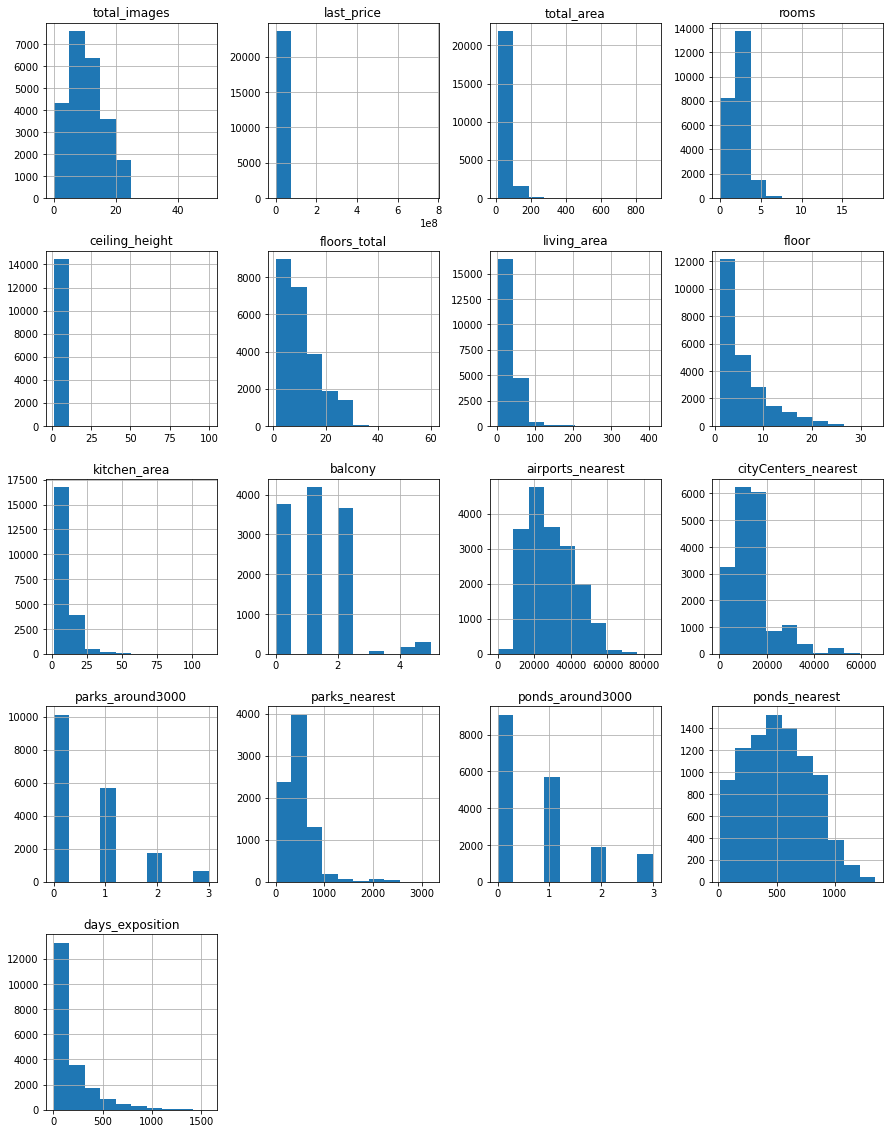

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

### Предобработка данных

#### 1) Избавимся от пропусков в данных

##### Для начал посмотрим общее количество пропусков во всех столбцах

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Довально много пропусков. Уберём сначала самые очевидные.

##### Пропуски в столбще ceiling_height можно заменить медианой

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

##### Пропусков в столбце, где показывается общее количество этажей, немного, поэтому эти строки можно удалить

In [8]:
data.dropna(subset=['floors_total'], inplace=True)

##### Пропущенные значения столбца living_area можно заменить медианой. При этом, будем заменять медианой, групирую по количеству комнат

In [9]:
for n in data['rooms'].unique():
    data.loc[(data['rooms'] == n) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == n), 'living_area'].median()
data['living_area']


0        51.0
1        18.6
2        34.3
3        45.0
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697    30.5
23698    12.3
Name: living_area, Length: 23613, dtype: float64

##### Пропуски в столбце kitchen_area заполним средним значением. Мы так же будем групировать, но в этот раз по общей площади квартиры

In [10]:
for n in data['living_area'].unique():
    data.loc[(data['living_area'] == n) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['living_area'] == n), 'kitchen_area'].mean()
print(data['kitchen_area'])
print()
print(data.isna().sum())

0        25.000000
1        11.000000
2         8.300000
3        12.251693
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696     8.615873
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23613, dtype: float64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area               61
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64


В столбце всё ещё остались 64 пропуска. Заполним их медианой

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())


##### Пропуски в столбще balcony скорее всего говорят о том, что балкона в квартире просто нету, значит, пропуски можно просто заменить на 0

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony']

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23613, dtype: float64

##### Строк, с пропусками в столбце locality_name немного, поэтому эти строки можно удалить

In [13]:
data.dropna(subset=['locality_name'], inplace=True)

##### Ещё раз убедимся, что мы убрали все ненужные пропуски

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

####  Преобразуем типы данных

##### Преобразуем типы данных в некоторых столбцах из float в int

In [15]:
data.astype({"last_price": "int64", "floors_total": "int64", "balcony": "int64"})

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Устраним неявные дубликаты в столбце с названиями

In [16]:
data.loc[data['locality_name'] == 'поселок городского типа Рябово', 'locality_name'] = 'поселок Рябово'
data.loc[data['locality_name'] == 'посёлок Тельмана', 'locality_name'] = 'поселок Тельмана'   
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

#### Устраним редкие и выбивающиеся значения

##### Уберём аномально большие значения в столбце ceiling_height

In [17]:
mask = data['ceiling_height'] >= 7
data.loc[mask, 'ceiling_height'] /= 10
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        0.8 ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  0.83,

##### Уберём аномальные значения в других столбцах

In [19]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)  
    
# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

data.describe()

1.0

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим столбец, который покажет стоимость одного квадратного метра

In [20]:
data['price_one_sq_m'] = data['last_price'] / data['total_area']

#### Добавим столбец, который покажет день недели публикации объявления. Для этого, сначала переведём запись даты в удобный формат

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [22]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['day_of_week']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_of_week, Length: 23565, dtype: int64

#### Теперь, который покажет месяц публикации

In [23]:
data['month'] = data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23565, dtype: int64

#### И наконец, который покажет год

In [24]:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23565, dtype: int64

#### Добавим столбец, который будет показывать тип этажа (первый, последний или другой)

In [25]:
def floor(row):   # Создадим функцию сортировки
    if row == 1:
        return 'первый'
    elif row == data['floors_total'][0]:
        return 'последний'
    else:
        return 'другой'  

data['floor_category'] = data['floor'].apply(floor)
data['floor_category']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 23565, dtype: object

#### И наконец, столбец который покажет расстояние до центра города в километрах

In [26]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest_km'] 

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23565, dtype: float64

### Проведите исследовательский анализ данных

#### Изучем разные параметры квартир

#####  Общая площадь

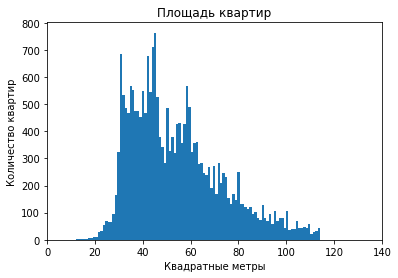

In [27]:
data['total_area'].plot(kind='hist', xlim=(0, 140), bins=100)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего квартиры имеют площадь от 30 до 100 квадратных метров. Пик приходится на квартиры с площадью 50 кв.м. Так же есть с площадью почти 300 кв.м.

##### Жилая площадь

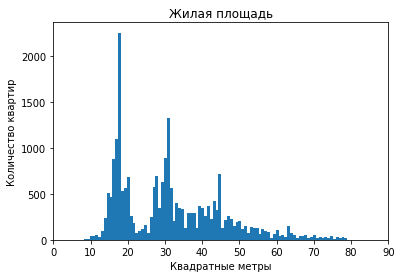

In [28]:
data['living_area'].plot(kind='hist', bins=100, xlim=(0, 90))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Жилая площадь чаще всего от 10 до 60 кв.м. Тут 2 пика: один около 15 кв.м., другой около 30 кв.м. Первый пик скорее всего является выбросом, так как после него идёт резкий спад, что не наблюдается на гистограмме общей площади

##### Площадь кухни

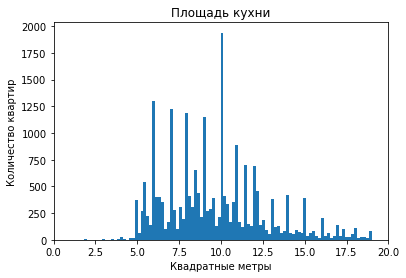

In [29]:
data['kitchen_area'].plot(kind='hist', bins=100, xlim=(0, 20))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Площадь кухни обычно от 5 до 15 кв.м. Пик составляет около 9 кв.м.

##### Цена объекта

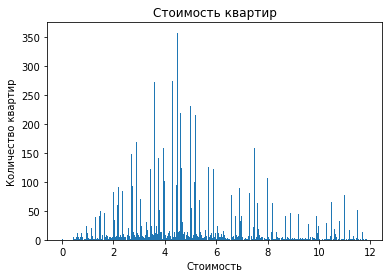

In [30]:
data['last_price'] = data['last_price'] / 1000000

data['last_price'].plot(kind='hist', bins=1000)
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Цена объекта обычно составляет от 1 до 12 млн.руб. Пик около 5 млн

##### Количество комнат

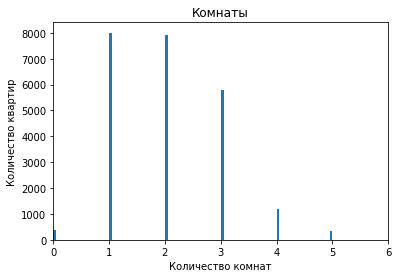

In [31]:
data['rooms'].plot(kind='hist', bins=100, xlim=(0, 6))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего продаются объекты с одной, двумя или, чуть реже, с тремя комнатами. Так же на графике видно, что продаются некоторые объекты с 0 комнат, что скорее всего является ошибкой.

##### Высота потолков

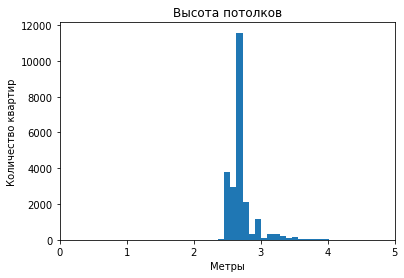

In [32]:
data['ceiling_height'].plot(kind='hist', bins=100, xlim=(0, 5))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего высота потолков составляет от 2,5 до 3 м. Большой пик составляет высота 2,6 м. Так же есть объекты с высотой потолков 4 м.

##### Этаж квартиры

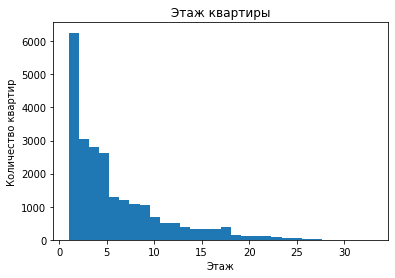

In [33]:
data['floor'].plot(kind='hist', bins=30)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

График распределения этажей похож на распределение Пуассона. Пик приходится на 2 этаж. Так же много квартир на 3, 4 и 5 этажах. Вообще, квартиры встречаются даже на 28 этаже.

##### Тип этажа квартиры

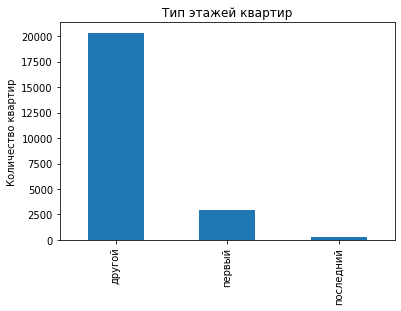

In [34]:
data['floor_category'].value_counts().plot(kind='bar')
plt.title('Тип этажей квартир')
plt.ylabel('Количество квартир')
plt.show()

Как видно по графику, квартиры на первом этаже продаются гораздо чаще, чем на последнем. Хотя, конечно, большинство проданных квартир располагаются на других этажах.

##### Общее количество этажей в доме

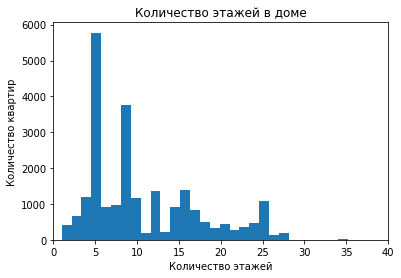

In [35]:
data['floors_total'].plot(kind='hist', bins=50, xlim=(0, 40))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

На графике видно несколько пиков. Самый большой это 5 этажей. Так же пик - это 9 этажей. Вообще количество этажей доходит до 28. Но есть выброс - 34 этажа. Так же на графике видны странные снижения на 11 и 13 этажах.

##### Расстояние до центра города в метрах

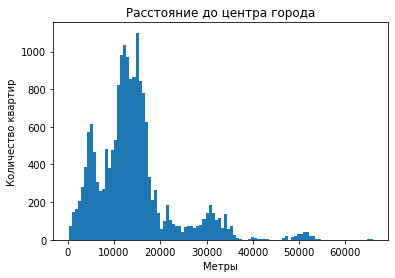

In [36]:
data['cityCenters_nearest'].plot(kind='hist', bins=100)
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Тут мы видем 2 пика - один около 5 тыс., и один около 11 - 13 тыс. Вообще значения доходят аж до 65 тыс.

##### Расстояние до ближайшего аэропорта

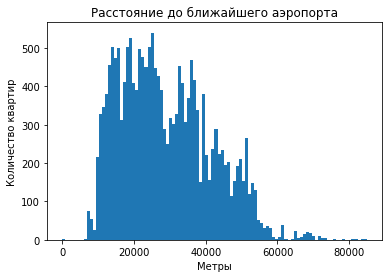

In [37]:
data['airports_nearest'].plot(kind='hist', bins=100)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего расстояние составляет от 10 тыс. до 50тыс. Пик приходится на 13 - 23 тыс. Точный пик выделить сложно. Так же есть пики около 35 и 50 тыс. Максимальные значения доходят до 85 тыс.

##### Расстояние до ближайшего парка

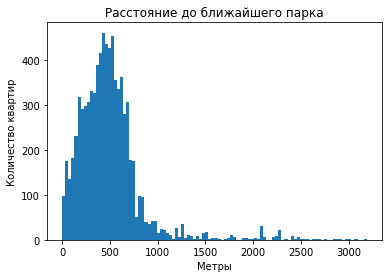

In [38]:
data['parks_nearest'].plot(kind='hist', bins=100)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего расстояние составляет от практически 0 до 800 метров. Хотя есть и очень большие значения, в том числе привыщающие 2000 м. Виден явный пик около 450 м. Хотя возможно он является частично ошибкой, но врятли сильно влияет на общие выводы.

##### День и месяц публикации объявления

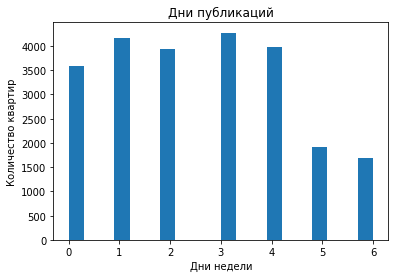

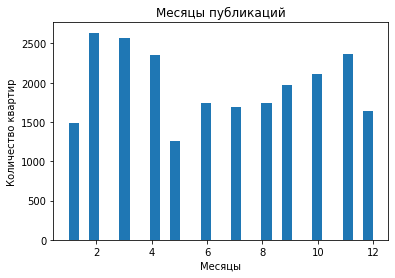

In [39]:
data['day_of_week'].plot(kind='hist', bins=20)
plt.title('Дни публикаций')
plt.xlabel('Дни недели')
plt.ylabel('Количество квартир')
plt.show()
data['month'].plot(kind='hist', bins=30)
plt.title('Месяцы публикаций')
plt.xlabel('Месяцы')
plt.ylabel('Количество квартир')
plt.show()

1. По первому графику можно заметить, что в выходные люди реже продают объекты, чем в будние дни.
2. На втором графике видно, что в декабрь и январь люди продаю квартиры гораздо реже. Так же видно, что к маю количеств проданных квартир снижается, а после него опять начинает рости.

#### Изучим, как быстро продавались квартиры

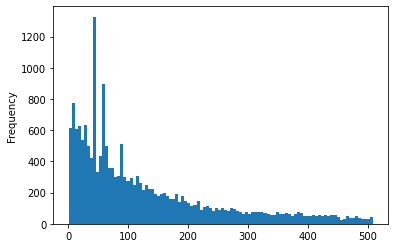

count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64 

Время продажи (медиана): 85 

Время продажи (среднее): 128 



In [40]:
data['days_exposition'].plot(kind='hist', bins=100)
plt.show()
print(data['days_exposition'].describe(),'\n')
print('Время продажи (медиана):', round(data['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data['days_exposition'].mean()),'\n')

Медианное время продажи - 85 дней. Среднее время продажи - 128 дней.

В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 41 день и меньше. Долгой продажей - 182 дня и дольше.

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Для этого, во-первых, посмотрим зависимость цены от общей площади

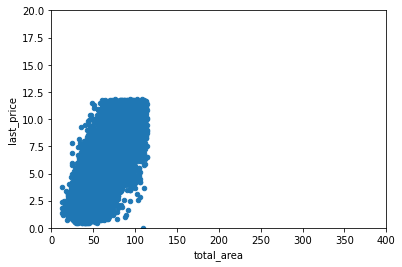

0.6940523107096932

In [41]:
total_area = data.pivot_table(index=data.index, values=('last_price', 'total_area'), aggfunc='median')
    
total_area.plot(kind='scatter', x='total_area', y='last_price', xlim=(0, 400), ylim=(0, 20))
plt.show()
total_area['total_area'].corr(total_area['last_price'])

Мы видим довольно чёткую зависимость для квартир с площадью до 130 кв.м. Далее было много выбросов, поэтому мы удалили остальные данные на предыдущих этапах. Значение корреляции довольно высокое.

#####  Посмотрим зависимость цены от жилой площади

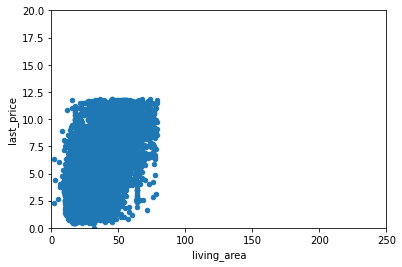

0.5517958842999492

In [42]:
living_area = data.pivot_table(index=data.index, values=('last_price', 'living_area'), aggfunc='median')
    
living_area.plot(kind='scatter', x='living_area', y='last_price', xlim=(0, 250), ylim=(0, 20))
plt.show()
living_area['living_area'].corr(living_area['last_price'])

На данном графике мы видем, что зависимость гораздо меньше, чем на предыдущем графике. Хотя некоторая зависимость всё же прослеживается. Значение корреляции ниже, чем в придыдущем случае.

##### Зависимость от площади кухни

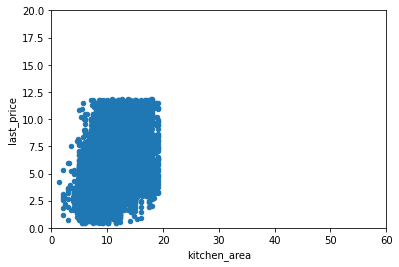

0.45190671692982753

In [43]:
kitchen_area = data.pivot_table(index=data.index, values=('last_price', 'kitchen_area'), aggfunc='median')
    
kitchen_area.plot(kind='scatter', x='kitchen_area', y='last_price', xlim=(0, 60), ylim=(0, 20))
plt.show()
kitchen_area['kitchen_area'].corr(kitchen_area['last_price'])

Здесь зависимость ещё меньше. Корреляции тоже меньше.

##### Зависимость от количества комнат

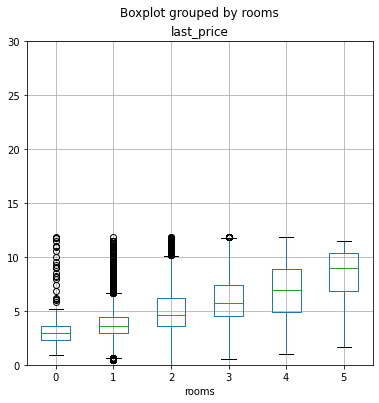

0.44375083368862145

In [44]:
data.boxplot(column=['last_price'], by='rooms', figsize=(6, 6))

plt.ylim(0, 30)
plt.show()

data['last_price'].corr(data['rooms'])

Тут мы видем довольно явную зависимость: чем больше количество комнат, тем выше цена. Хотя процент корреляции довольно низкий. Скорее всего это из-за большго числа выбросов.

##### Зависимотсть от типа этажа

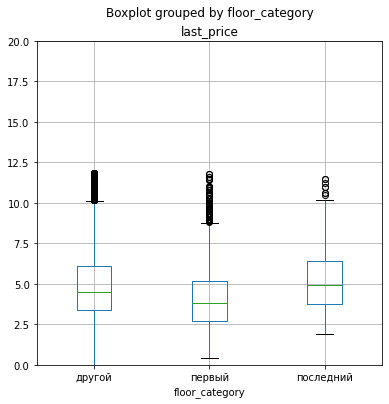

In [45]:
data.boxplot(column=['last_price'], by='floor_category', figsize=(6, 6))

plt.ylim(0, 20)
plt.show()


По этому графику мы видем, что квартиры на первом этаже обычно стоят дешевле, чем квартиры других этажах, а квартиры на последнем чуть больше, чем все остальные.

##### Зависимтость от дня недели

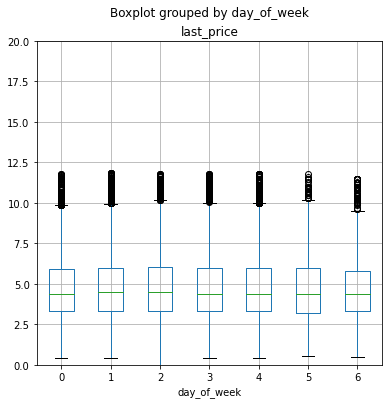

In [46]:
data.boxplot(column=['last_price'], by='day_of_week', figsize=(6, 6))

plt.ylim(0, 20)
plt.show()

Тут наблюдается небольшая зависимость, а именно: к середине недели, обычно, цена на квартиры немного увеличивается, а потом к выходным опять уменьшается.

##### Зависимость от месяца

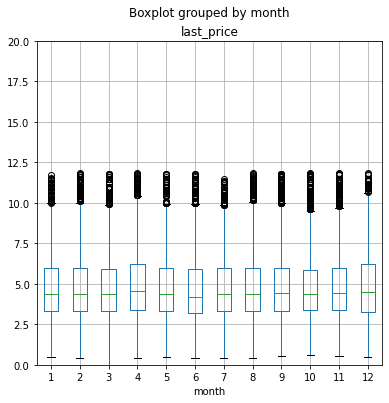

In [47]:
data.boxplot(column=['last_price'], by='month', figsize=(6, 6))

plt.ylim(0, 20)
plt.show()

Тут зависимости нету практически никакой: просто в некоторые месяцы чуть больше, в некоторые чуть меньше.

##### Зависимость от года

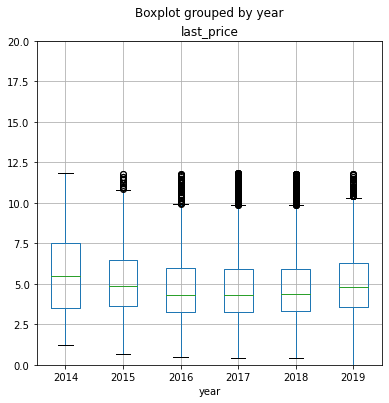

In [48]:
data.boxplot(column=['last_price'], by='year', figsize=(6, 6))

plt.ylim(0, 20)
plt.show()

Вначале виден спад цен к 2017 году, а потом рост, вплоть до 2019 года.

#### Посмотрим, цену квадратного метра в разных населённым пунктах

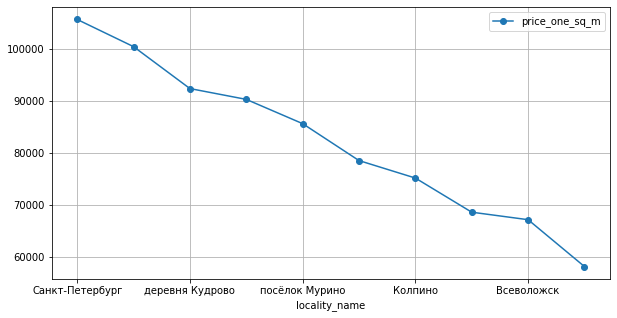

,price_one_sq_m
locality_name,
Санкт-Петербург,105686
Пушкин,100462
деревня Кудрово,92409
посёлок Парголово,90332
посёлок Мурино,85673
посёлок Шушары,78578
Колпино,75221
Гатчина,68664
Всеволожск,67222


In [49]:
locality_ten = data['locality_name'].value_counts().head(10)
locality_sq_price = data.query('locality_name in (@locality_ten.index)').pivot_table(values='price_one_sq_m', index='locality_name')
locality_sq_price = locality_sq_price.astype(int)

locality_sq_price.sort_values('price_one_sq_m', ascending=False).plot(grid=True, style='o-', figsize=(10, 5))
plt.show()

locality_sq_price.sort_values('price_one_sq_m', ascending=False)

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Наименьшая же стоимость оказалась в Выборге.

#### Выясним, как расстояние до центра города влияет на стоимость квартиры

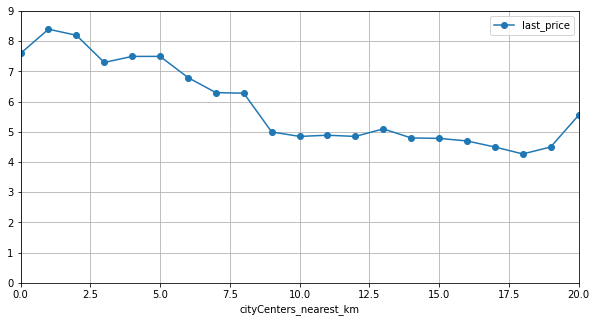

In [50]:
spb_km_price = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', xlim=(0,20), ylim=(0, 9),figsize=(10, 5))
    
)
plt.show()


По графику хорошо видно, что чем дальше от цента города, тем дешевле стоимость квартир.

### Общий вывод

В ходе исследования, я сделал:

1) Просмотрел данные, увидел столбцы с аномальными или пропущенными значениями. Для удобства построил графики;

2) Избавился от пропусков в данных. Удалил аномальные значения;

3) Добавил новые столбцы для облегчения работы с данными;

4) Изучил разные параметры квартиры;

5) Узнал, какие параметры больше всего влияют на стоимость квартир;

6) Посчитал, в каких начелённых пунктах самая высокая и самая низкая цена за квадратный метр;

7) Посчитал, цену квадратного метра, для каждого километра от центра города;




Общий вывод:

Чаще всего квартиры продают за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 41 день и меньше. Долгой продажей - 182 дня и дольше

На стоимость квартир больше всего площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. А квартиры на последнем этаже обычно дороже остальных. Смотря по годам, видно, что до 2017 года был спад цен, но начиная со следующего года квартиры расли вплоть до 2019.

Дороже всего квадратный метр в Санкт-Петербурге - 105686. Также дорогой квадратный метр в Пушкине - 100462, и в деревне Кудрово -92409.

Дешевле всего квадратный метр в Выборге - 58141. Так же дешёвый квадратный метр в Всеволожске - 67222, и в Гатчине - 68664.